# Primera Red Neuronal: Conversor Celsious a Farenheit
- Jony Cardenas Herrera
- Nicolas Botero Diaz


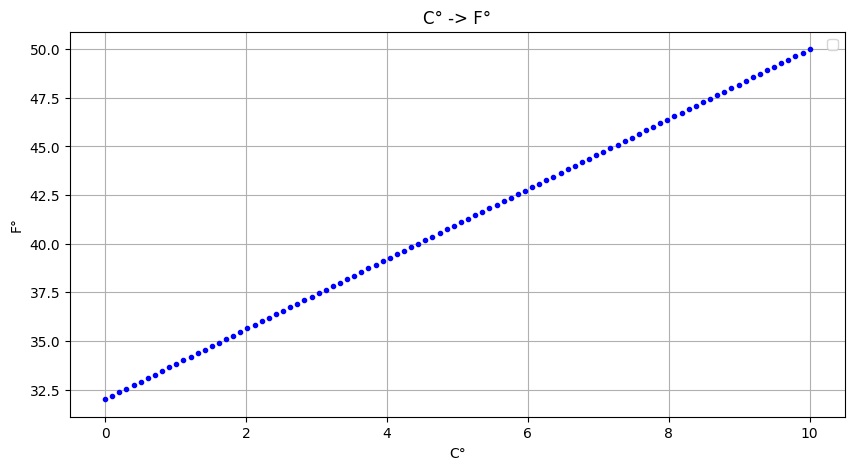

In [ ]:
import numpy as np

C = np.linspace(0,10,100) #Datos de entrenamiento
F = [round(x*1.8 + 32,2) for x in C] #Conversión

C_T = np.linspace(10,20,50) #Datos de prueba
F_T = [round(x*1.8 + 32,2) for x in C_T]

def error_prediccion(r,p):
    e = np.mean(np.abs((r-p)/r))*100 #Porcetaje de error Normalizado
    return(round(e,2))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))  #modificar el tamaño (x,y)
plt.plot(C,F,'b.',linewidth=1)
plt.xlabel('C°')
plt.ylabel('F°')
plt.title(f'C° -> F°')
plt.legend()
plt.grid()
plt.show()


Funcion Prediccion: f(°C) = 1.83°F + 31.78

[1936.3520998710635, 419.4729572819271, 266.7749661266118, 249.40026855287852, 245.4691680968485, 242.8932835446425, 240.47345939811245, 238.09054770136675, 235.73251895907396, 233.3979699049579, 231.08655327519998, 228.79802860221432, 226.53216805092055, 224.28874705927564, 222.06754338998584, 219.86833701664602, 217.6909100928355, 215.5350469296352, 213.4005339741729, 211.28715978845992, 209.19471502844644, 207.1229924232844, 205.0717867547954, 203.04089483714301, 201.03011549670563, 199.03924955214887, 197.06809979469514, 195.1164709685892, 193.18416975175623, 191.27100473665234, 189.37678641130427, 187.50132714053677, 185.6444411473865, 183.80594449469885, 181.98565506690855, 180.183392551999, 178.39897842364215, 176.6322359235134, 174.88299004378274, 173.15106750977927, 171.43629676282708, 169.73850794325088, 168.05753287355054, 166.3932050417421, 164.74535958486337, 163.11383327264303, 161.49846449133196, 159.89909322769404, 158.315561

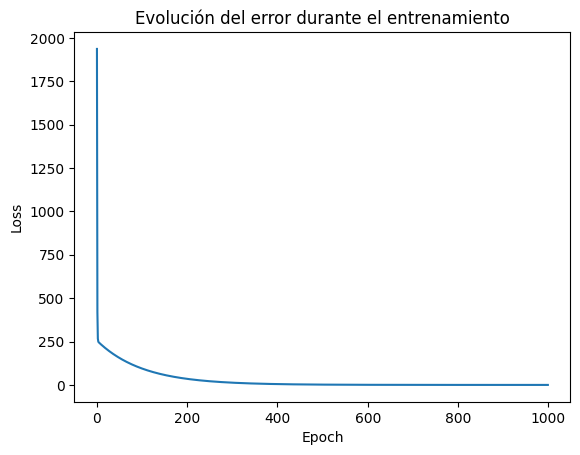

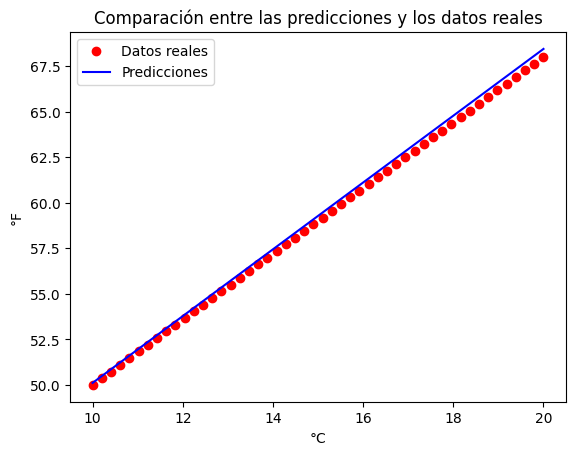

In [ ]:

import matplotlib.pyplot as plt

# Definimos los datos de entrenamiento
x_train = np.array(C) #Celcious
y_train = np.array(F) #Farenheit

# Definimos los hiperparámetros del modelo
learning_rate = 0.01
epochs = 1000

# Inicializamos los parámetros del modelo
w = np.random.randn()
b = np.random.randn()

# Definimos la función de predicción
def predict(x):
    return w*x + b

# Definimos la función de pérdida (mean squared error)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Entrenamos el modelo
losses = []
for epoch in range(epochs):
    # Calculamos las predicciones actuales
    y_pred = predict(x_train)

    # Calculamos el error
    loss = mse_loss(y_train, y_pred)
    losses.append(loss)

    # Calculamos los gradientes de los parámetros
    w_grad = np.mean(2*(y_pred - y_train)*x_train)
    b_grad = np.mean(2*(y_pred - y_train))

    # Actualizamos los parámetros
    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

# Imprimimos el error final y las predicciones
x_test = np.array(C_T)
y_test = np.array(F_T)
y_pred = predict(x_test)
mse = mse_loss(y_test, y_pred)

print(f'\nFuncion Prediccion: f(°C) = {round(w,2)}°F + {round(b,2)}\n')

print(losses)

e_manual = error_prediccion(np.array(F_T),predict(x_test))

# Graficamos la evolución del error durante el entrenamiento
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Evolución del error durante el entrenamiento")
plt.show()



# Graficamos la comparación entre las predicciones y los datos reales
plt.plot(x_test, y_test, "ro", label="Datos reales")
plt.plot(x_test, y_pred, "b-", label="Predicciones")
plt.legend()
plt.xlabel("°C")
plt.ylabel("°F")
plt.title("Comparación entre las predicciones y los datos reales")
plt.show()

# Keras Conversion

[861.8478393554688, 234.86343383789062, 226.8842010498047, 220.05850219726562, 204.75144958496094, 200.71658325195312, 189.90716552734375, 184.2440948486328, 181.0951385498047, 170.22789001464844, 164.58935546875, 155.81141662597656, 146.2357635498047, 142.90206909179688, 139.13478088378906, 132.21583557128906, 124.58617401123047, 124.2948226928711, 115.87133026123047, 114.51370239257812, 107.56587982177734, 101.73715209960938, 97.99920654296875, 96.48046112060547, 91.72056579589844, 89.94908905029297, 83.52011108398438, 79.76824188232422, 75.68244171142578, 72.52336120605469, 73.59219360351562, 68.2698974609375, 64.31240844726562, 62.30244064331055, 59.2383918762207, 59.309852600097656, 57.55257797241211, 53.192474365234375, 50.805702209472656, 48.76872634887695, 47.635433197021484, 45.71608352661133, 43.665794372558594, 43.280540466308594, 39.52950668334961, 39.265167236328125, 36.68989944458008, 35.76311492919922, 33.77885818481445, 32.68675231933594, 31.5145206451416, 30.4045391082

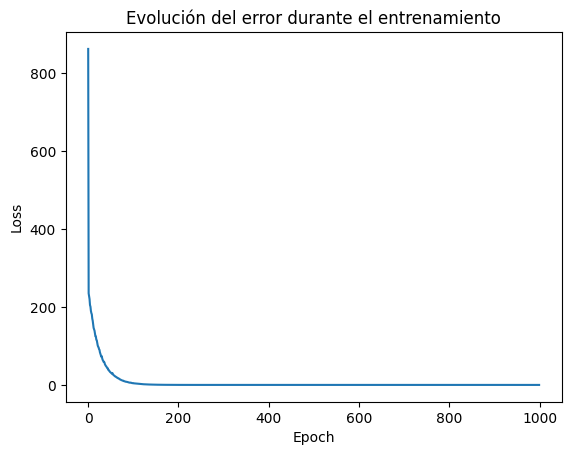

2/2 [==============================] - 0s 6ms/step


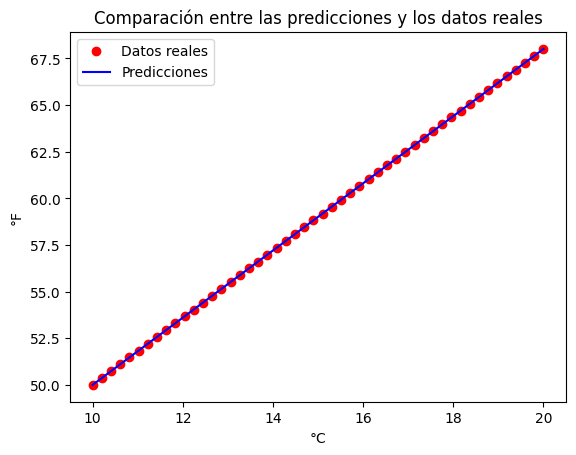

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# Definimos los datos de entrenamiento
x_train = np.array(C) #Cargar los Datos de Entrenamiento
y_train = np.array(F)

# Definimos el modelo en Keras
model = Sequential()
model.add(Dense(1, input_shape=(1,)))  # Capa densa con 1 neurona
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01))

# Entrenamos el modelo
history = model.fit(x_train, y_train, epochs=1000, verbose=0)

# Imprimimos el error final
losses = history.history['loss']
print(losses)

# Graficamos la evolución del error durante el entrenamiento
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Evolución del error durante el entrenamiento")
plt.show()

# Generamos predicciones y calculamos el error en un conjunto de prueba
x_test = np.array(C_T)
y_test = np.array(F_T)
y_pred = model.predict(x_test)
mse = np.mean((y_test - y_pred.squeeze())**2)

e_keras = error_prediccion(np.array(F_T),model.predict(x_test))


# Graficamos la comparación entre las predicciones y los datos reales
plt.plot(x_test, y_test, "ro", label="Datos reales")
plt.plot(x_test, y_pred, "b-", label="Predicciones")
plt.legend()
plt.xlabel("°C")
plt.ylabel("°F")
plt.title("Comparación entre las predicciones y los datos reales")
plt.show()

#Efectividad de los modelos basado en el error

In [ ]:
print(f'Error Metodo Manual: {e_keras}')
print(f'Error Metodo Keras: {e_manual}')

Error Metodo Manual: 10.48
Error Metodo Keras: 0.45
